# 01: Úvod a vizualizace

## Import základních balíčků

### NumPy 
  * Balíček pro rychlé „vědecké“ výpočty (zejména lineární algebra a náhodná čísla).
  * Většinou se jedná jen o interface k vysoce optimalizovaným C/C++/Fortran knihovnám.
  * http://www.numpy.org/

### pandas
  * Oblíbený nástroj pro datovou analýzu.
  * Pomáhá usnadnit práci s tabulkovými daty.
  * http://pandas.pydata.org/

### scikit-learn (sklearn)
  * Soubor nástrojů datové vědy psaný v Pythonu.
  * Staví na NumPy, [SciPy](https://www.scipy.org/) a matplotlib
  * http://scikit-learn.org/stable/
  
### matplotlib
  * Základní knihovna pro vykreslování grafů.
  * https://matplotlib.org/

### seaborn
  * Nástroj pro vizualizaci dat, založený na matplotlib.
  * https://seaborn.pydata.org/

In [1]:
import numpy as np
import pandas as pd
import sklearn as skit
import matplotlib.pyplot as plt
import seaborn as sns

## Základní práce s daty pomocí knihovny pandas

  - Načtěte datasety data1.csv a data2.csv pomocí pandas.
  - Zjistěte, jakých typů jsou data ve sloupcích (obsahují stringy, čísla, ...? Jaký mají rozsah?)

### Načítání dat

  - Načítání dat z csv souborů do pandas typu DataFrame.

In [2]:
data1 = pd.read_csv('data1.csv')
data2 = pd.read_csv('data2.csv',sep=';')

### Pomocí pandas funkcí si můžeme zobrazit základní informace o datasetu

In [3]:
df = data2
df.head()
#df.info()
#df.describe()
#df.isnull().sum()
#df.notnull().sum()
display(df.head())
data1.tail()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,BirthYear,FootSize,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,1879.0,31,0,0,110152,86.5000,B77,S
1,1,2,0,3,"Garfirth, Mr. John",male,NaN,39,0,0,358585,14.5000,NaN,S
2,2,3,0,3,"Nirva, Mr. Iisakki Antino Aijo",male,1871.0,35,0,0,SOTON/O2 3101272,7125.0000,NaN,S
3,3,4,1,3,"Barah, Mr. Hanna Assi",male,1892.0,54,0,0,2663,7.2292,NaN,C
4,4,5,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,1876.0,18,1,2,113760,120.0000,B96 B98,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
754,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.00,1,2,220845,65.0000,NaN,S
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
756,757,0,3,"Carlsson, Mr. August Sigfrid",male,28.00,0,0,350042,7.7958,NaN,S
757,758,0,2,"Bailey, Mr. Percy Andrew",male,18.00,0,0,29108,11.5000,NaN,S
758,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.00,0,0,363294,8.0500,NaN,S


### Základy přístupu k datům 

In [4]:
#data1['Age'] # vrátí sloupec se jménem (pandas.Series.name) Age
#data1.Age # totéž co výše
#data1['Age'][:10] # vrátí prvních 10 záznamů ze sloupce Age 
#data1['Age'][:3][[True, False, True]]
#data1['Age'] > 30 # podmínka se použije na všechny záznamy -> vrací pandas.Series s výsledky (hodnoty True nebo False)
data1[data1['Age'] > 30] # vrátí jen osoby starší než 30 let
data1[['Age', 'Survived']].head() # vrátí jen zadané sloupce
#data1_tmp = data1.copy() # vytvoří hlubokou kopii dataframe
#data1_tmp.columns = range(12) # přejmenování sloupců
#display(data1.head())
#data1_tmp.head()
#data1[1:2] # vrací první řádek
data1.loc[1,['Age', 'Sex','Age']] # indexy (viz .loc? a .iloc?)

Age        38
Sex    female
Age        38
Name: 1, dtype: object

## Úloha 01: Zřetězení dat

  - Připojte data2.csv za data1.csv následujícím způsobem:
      - Data (sloupce), která nejsou v data1.csv jsou v data2.csv vynechána.
      - Spočítejte věk pomocí sloupce BirthYear (rok narození) v data2.csv a uložte jej do sloupce Age.
      - PasangerId musí být unikátní.
      - Použijte metodu pandas.concat.

In [5]:
### sem napište svůj kód


data2['Age'] = pd.Series(2018-data2['BirthYear'],index=data2.index)
data = pd.concat([data1,data2], join='inner')
data['PassengerId'] = range(len(data))
data.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
127,886,0,2,"Montvila, Rev. Juozas",male,133.0,0,0,211536,13.00,NaN,S
128,887,1,1,"Graham, Miss. Margaret Edith",female,125.0,0,0,112053,30.00,B42,S
129,888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
130,889,1,1,"Behr, Mr. Karl Howell",male,132.0,0,0,111369,30.00,C148,C
131,890,0,3,"Dooley, Mr. Patrick",male,138.0,0,0,370376,7.75,NaN,Q


## Vizualizace pomocí pandas a seaborn

In [6]:
import matplotlib.pyplot as plt # takto se matplotlib standardně importuje
import matplotlib
# bez násl. řádku někdy nefunguje vykreslování grafů v Jupyter noteboocích
%matplotlib inline 
matplotlib.style.use('ggplot')

### Vliv sloupců Pclass, Age a Sex na přežití cestujících

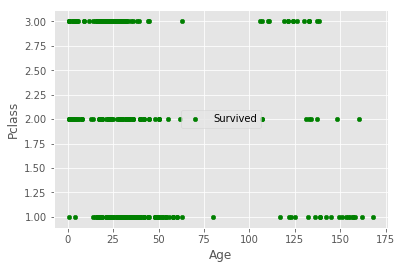

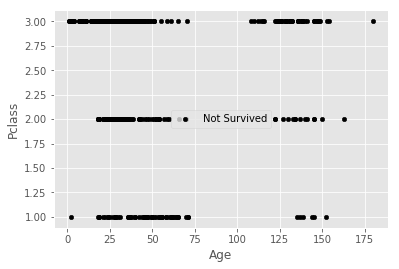

In [7]:
#data.plot() # výchozí chování metody plot()
#podívejte se, jaké druhy grafů jsou k dispozici
#data.plot?

# získání přeživších a nepřeživších osob
survived = data[data['Survived'] == 1]
not_survived = data[data['Survived'] == 0]

ax = survived.plot.scatter(x='Age', y='Pclass', color='Green', label='Survived')
not_survived.plot(x='Age', y='Pclass', kind='scatter', color='Black', label='Not Survived')
# vykreslení grafů do jednoho obrázku:
# not_survived.plot.scatter(x='Age', y='Pclass', color='Black', label='Not Survived', ax = ax)

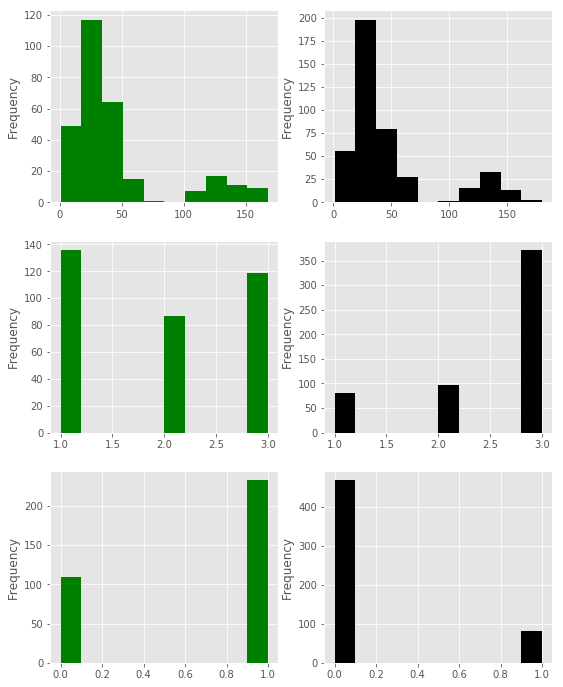

In [8]:
plt.figure(figsize=(9,12)) # velikost figsize se určuje v palcích (angl. inches)
plt.subplot(321) # tři řádky a dva sloupce, přiřaď následující graf do prvního slotu
survived['Age'].plot.hist(color='Green')
plt.subplot(322)
not_survived['Age'].plot.hist(color='Black')
plt.subplot(323)
survived['Pclass'].plot.hist(color='Green')
plt.subplot(324)
not_survived['Pclass'].plot.hist(color='Black')
plt.subplot(325)
survived['Sex'].apply(lambda x: 1 if x == 'female' else 0).plot.hist(color='Green')
plt.subplot(326)
not_survived['Sex'].apply(lambda x: 1 if x == 'female' else 0).plot.hist(color='Black')

## Seaborne: jak zjistit vztahy mezi příznaky

          Survived    Pclass       Sex       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481  0.543351 -0.026831 -0.035322  0.081629 -0.027145
Pclass   -0.338481  1.000000 -0.131900 -0.096160  0.083081  0.018443  0.084197
Sex       0.543351 -0.131900  1.000000 -0.014326  0.114631  0.245489  0.026989
Age      -0.026831 -0.096160 -0.014326  1.000000 -0.160343 -0.075122  0.243926
SibSp    -0.035322  0.083081  0.114631 -0.160343  1.000000  0.414838  0.116760
Parch     0.081629  0.018443  0.245489 -0.075122  0.414838  1.000000  0.159925
Fare     -0.027145  0.084197  0.026989  0.243926  0.116760  0.159925  1.000000


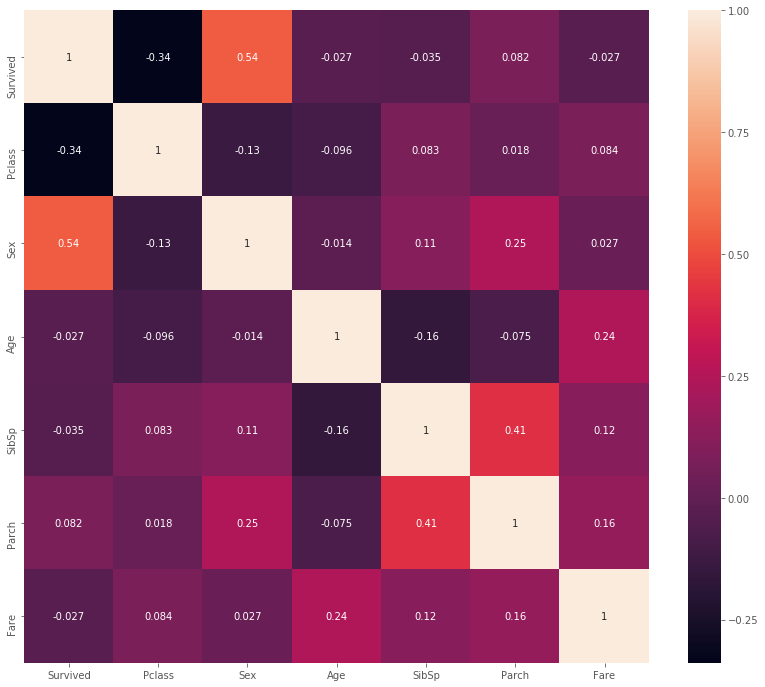

In [9]:
plt.figure(figsize=(14,12))
data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'female' else 0)
cor_matrix = data.drop('PassengerId', axis=1).corr()
print(cor_matrix)
sns.heatmap(cor_matrix, annot=True)

## Úloha 02: vytvořte bodový graf (scatter plot) pro všechny dvojice příznaků

  - K vykreslení všech (smysluplných) dvojic příznaků použijte metodu sns.pairplot, podobným způsobem jako metodu níže.

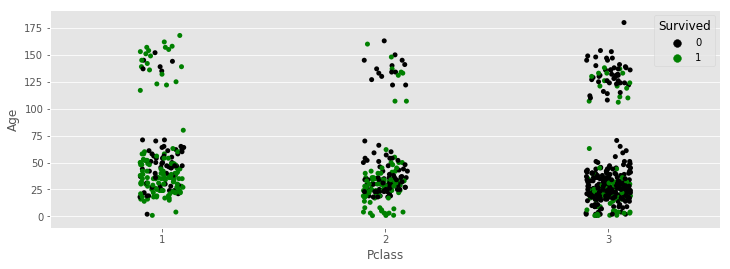

In [10]:
plt.figure(figsize=(12,4))
sns.stripplot(x="Pclass", y="Age", hue="Survived", data=data, palette= ['black','green']) # add jitter=True

In [11]:
### sem napište svůj kód

## Stahování dat z webu pomocí Pythonu a pandas (1. úkol)
          
### Tipy:
   - K získání HTML zdrojáku stránky s `url` použijte `import requests`: 
      - `r = requests.get(url)`
      - `html = r.text`
   - Metoda `pandas.read_html(r.text)` uloží všechny tabulky `<table>` jako seznam pandas DataFrames:
      - `list_of_data_frames = pd.read_html(html,flavor='html5lib')`
   - Pro HTML parsování lze použít `from bs4 import BeautifulSoup`.

In [12]:
import requests
from bs4 import BeautifulSoup

### Příklad jednoduchého stažení dat z webu pomocí POST formuláře.

Úkolem je stáhnout všechna data z http://kap.ujak.cz/index.php a uložit je ve formátu pandas DataFrame.

In [13]:
# url s formulářem
url = 'http://kap.ujak.cz/index.php?strana={}'
# nastavení POST proměnných simulující odeslání formuláře
data = {
    'typ' : 'kap',
    'prace' : 'BP', # DP = diplomka, DR = disertace, RI = rigorozní
    'nazev' : '%%%', # alespoň tři písmena z názvu hledané práce
    'pocet' : '0',
    'klic' : '', # alespoň tři písmena z klíčových slov
    'kl' : 'c', # c = částečně odpovídá, n = plně odpovídá
    'hledat' : 'Vyhledat'
}

data_all = pd.DataFrame()
for prace in ['BP', 'DP']:
    data['prace'] = prace
    r = requests.post(url, data)
    r.encoding='cp1250'
    ldf = pd.read_html(r.text,flavor='html5lib', header=0)
    df = ldf[0]
    strana = 30
    if data_all.shape[0] == 0:
        data_all = df.copy()
    else:
        data_all = pd.concat([data_all,df], ignore_index=True)
    while df.shape[0] > 0:
        if data_all.shape[0] > 200: # just to prevent from downloading all data
            break
        print(url.format(strana))
        r = requests.post(url.format(strana), data)
        r.encoding='cp1250'
        ldf = pd.read_html(r.text,flavor='html5lib', header=0)
        df = ldf[0]
        strana = strana + 30
        data_all = pd.concat([data_all,df], ignore_index=True)

http://kap.ujak.cz/index.php?strana=30
http://kap.ujak.cz/index.php?strana=60
http://kap.ujak.cz/index.php?strana=90
http://kap.ujak.cz/index.php?strana=120
http://kap.ujak.cz/index.php?strana=150
http://kap.ujak.cz/index.php?strana=180


In [14]:
dataUJAK = pd.read_csv('ujak.csv', index_col=0)
display(dataUJAK.head())
dataUJAK[dataUJAK['Rok'] > 2000].groupby(['Název práce']).size().sort_values(ascending=False)

,Autor,Název práce,Vedoucí,Rok,Typ práce
0,Abdrakhmanova Aizhan,Vliv médií na děti a mládež v Kazachstánu,"Svobodová Alena, Doc. PhDr.; CSc.",2017,BP
1,Abdullayev Timur,Inflation: Kazakhstani and global tendencies,"Vacenovský Michal, Ing.; LL.M.",2011,BP
2,Abdussattarov Nursultan,Payment system od Kazakhstan: modern condition...,"Vacenovský Michal, Ing.; LL.M.",2011,BP
3,Ábelová Šárka,Rovné příležitosti mužů a žen na trhu práce (Z...,"Vacínová Marie, PhDr.; CSc.",2007,BP
4,Abrahámová Jaroslava,Nekalá soutěž v aplikační praxi soudů v ČR,"Rákosník Jakub, Doc. PhDr. JUDr; Ph.D.",2008,BP


Název práce
Mezilidské vztahy na pracovišti                                                         56
Vliv rodiny na zdravý duševní vývoj dítěte                                              51
Domácí násilí                                                                           33
Specifické poruchy učení                                                                32
Kvalita života seniorů                                                                  31
Syndrom vyhoření                                                                        28
Vzdělávání seniorů                                                                      28
Systém vzdělávání a rozvoj lidských zdrojů v organizaci                                 27
Vedení týmu                                                                             27
Motivace, hodnocení a odměňování pracovníků v organizaci                                25
Dieťa postihnuté autizmom - možnosti výchovy a vzdelávania                    